# Syfte:
Syftet med dagens laborationen är att du skall:
* få förståelse för punkt- och intervallskattningar.
* få förståelse för hypotestest och styrkefunktioner.
* arbeta igenom ett riktigt exempel baserat på Radon mätningar.

# Bakgrund
Under den här laborationen kommer vi arbeta igenom ett exempel på en statistisk analys av Radon-mätningar samt illustrera de teoretiska egenskaperna hos skattningar och hypotestest. Uppgifterna i laborationen växlar mellan analysen av Radon-mätningarna och simulerings baserade illustrationer av punkt- och intervallskattningar, hypotestest och styrkefunktioner

## Något om Radon och Radonmätningar
Radon är en ädelgas som är radioaktiv där den vanligast förekommande isotopen har en halveringstid på 3.8 dygn. Vid sönderfallen bildas alfa-partiklar, som kan orsaka (stor) skada i sin allra närmaste omgivning. Om gasen har inandats utgör lungvävnaden den närmaste omgivningen och Radon i inomhusmiljö beräknas orsaka 400 fall av lungcancer per år. 2004 sänktes riktvärden för bostäder från 400 Bq/$m^3$ till 200 Bq/$m^3$ (1 Bq/$m^3$ innebär att en atom sönderfaller per sekund i varje kubikmeter luft). Socialstyrelsens mål är att alla bostäder och offentliga utrymmen ska uppnå riktvärden senast 2020 (Världshälsoorganisationen, WHO, rekommenderar högst 100 Bq/$m^3$; enligt en [analys från Boverket](https://www.boverket.se/globalassets/publikationer/dokument/2011/radon-i-inomhusmiljon.pdf) är 100 Bq/$m^3$ inte ''*samhällsekonomiskt rimligt*''.)

Ett sätt att mäta radonkoncentrationen i inomhusluften är att hänga upp en alfa-känslig film. När filmen träffas av alfa-partiklar uppstår hål i filmen,  antalet hål på en yta är ett mått på radonkoncentrationen.

## Statistisk modell
För att kunna göra en ordentlig statistisk analys av ett mätmaterial behöver vi en statistisk model för radioaktivt sönderfall. Det visar sig att sönderfallen bildar en **poisson-process**, där antalet sönder fall under en tidsperiod är Poissonfördelat enligt $\text{Po}(\lambda \cdot T)$, där $\lambda$ beror av ämnets koncentration och halveringstid; $T$ är längden av tidsperioden.

För våra filmer blir nu antalet hål på en given yta också Poisson-fördelat med ett väntevärde som är proportionellt mot Radonkoncentrationen, exponeringstiden och ytans storlek. Vidare är antalet hål på disjunkta (ej överlappande) ytor på en film **oberoende** stokastiska variabler.

## Förberedelseuppgifter
1. Repetera teorin för punkt- och intervallskattningar.
2. **Mozquizto:** Om $X_i \in \text{Po}(\mu_i)$ och oberoende vilken fördelning har då summan\\ $Y = \sum_{i=1}^n X_i$?
3. **Mozquizto:** Givet ett stickprov $x$ från $X \in \text{Po}(\lambda \cdot T)$ ange en skattning av $\lambda$ och skattningens medelfel.
4. Givet ett stickprov $x_1, \ldots, x_5$ från $X_i \in \text{Po}(\lambda \cdot T)$ när kan skattningen $\lambda^\ast = \overline{x} / T$ normalapproximeras?
5. **Mozquizto:** Vi har ett stickprov $x_1, \ldots, x_5$ från $X_i \in \text{N}(\mu,3)$. En lämplig skattning av det okända väntevärdet $\mu$ är  $\mu^\ast = \overline{x}$. Vilken fördelning kommer skattningen $\mu^\ast = \overline{x}$ att följa?
6. **Mozquizto:** Givet stickprovet i fråga, hur konstrueras ett $95\%$-igt konfidensintervall för $\mu$? Vad händer om $\sigma$ är okänd?
7. Förvissa dig om att du förstår hur hypotesprövning går till och vad styrkefunktionen innebär.
8. **Mozquizto:** Givet stickprovet och skattningen i fråga 5, vill vi testa $H_0$: $\mu=0$ mot $H_1$: $\mu \neq 0$ på signifikansnivån $\alpha = 0.05$ med hjälp av en teststorhet. Hur ser teststorheten och när ska $H_0$ förkastas?
9. Givet en observation $x=3$ från $X \in \text{Po}(\mu)$ där vi vill test $H_0$: $\mu = 8$ mot $H_1$: $\mu < 8$ på signifikansnivån $\alpha = 0.05$ med hjälp av direktmetoden.  Beräkna testets P-värde och avgör om $H_0$ ska förkastas eller ej.

# Importera moduler och ladda upp filer till Colab
Kör koden nedan för att hämta de väsentliga modulerna vi kommer att använda i laborationen.


In [50]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Utöver modulerna ovan använder laborationen ett par funktioner och datamaterial.
1. Ladda ner filerna från kurshemsidan
2. Klicka på mappen *Filer* till vänster i *google colab* menyn
3. Ladda upp filerna genom att klicka på *Ladda upp till sessionens lagringsutrymme* (eller drag-n-drop filen)

### Google Colabs

In [51]:
import sys
#Addera content till sökvägen för python
sys.path.append('/content')  #Här kan du behöva uppdater sökvägen.
#importera funktionerna
from skattningar import skattningar
from styrkefkn import styrkefkn
#läs in data
#radon = pd.read_csv(r'/content/radon.csv') #Här kan du behöva uppdater sökvägen.

### Egen dator

In [52]:
#för icke colabs (antar att filerna ligger i samma katalog)
from skattningar import skattningar
from styrkefkn import styrkefkn
#läs in data
radon = pd.read_csv('radon.csv')

# Skattningar av Radonkoncentrationen
Det datamaterial som vi skall arbeta med har uppmätts genom att ett antal rum i en bostad har försetts med var sin film.  Dessa filmer har efter framkallning avlästs på tio, lika stora, icke överlappande ytor.  Vi inför följande beteckningar:
* $n =$ antalet upphängda filmer, dvs antalet rum,
* $\gamma_i =$ radonkoncentrationen i rum $i$, mätt i Bq/$m^3$,
* $X_{ij} =$ antalet hål i film $i$ på yta $j$, $i=1,\ldots,n$, $j=1,\ldots,10$.
Enligt ovan gäller då $X_{ij} \in \text{Po}(K \gamma_i)$, där proportionalitetskonstanten $K$ beror på avläsningsytornas storlek, exponeringstiden och framkallning/avläsningen av filmerna.

## Radonmätningarna
Datamaterialet är uppmätt i en nybyggd bostad under 32 dagar i mars och april. Datamaterialet finns i **radon.csv** som vi importerade tidigare och innehåller data för tre olika rum (vardagsrum, sovrum och Mikaels rum) med 10 mätningar per rum.


In [53]:
print(radon)
print(radon.describe())

   Vardagsrum  Sovrum  Mikael
0          20      14      11
1          17      15      17
2          22      17      19
3          15      13      14
4          20      14      25
5          22      11      17
6          24      15      18
7          22      16      16
8          34      22      23
9          20      15      21
       Vardagsrum     Sovrum     Mikael
count   10.000000  10.000000  10.000000
mean    21.600000  15.200000  18.100000
std      5.081557   2.898275   4.148628
min     15.000000  11.000000  11.000000
25%     20.000000  14.000000  16.250000
50%     21.000000  15.000000  17.500000
75%     22.000000  15.750000  20.500000
max     34.000000  22.000000  25.000000


**Efter förberedelseuppgifterna i Mozquizto kommer du att få ett eget värde på $K$ att arbeta med.**

In [54]:
K = 0.103 # Ändra sen, min placebo #värde från Mozquizto

Syftet med analysen av datamaterialet är att utreda om riktvärdet på 200 Bq/$m^3$ överskrids eller inte.

## Punktskattningar
Vi startar med att studera de tre rummen var för sig. Tänk igenom att en väntevärdesriktig punktskattning $\gamma_i^\ast$ av
$\gamma_i$, $i=1,2,3$, ges av 

$\gamma_i^\ast = \frac{1}{10K} \sum_{j=1}^{10} X_{ij} = \frac{\overline{X}_i}{K} \qquad$ där $\overline{X}_i$ är medelvärdet i rum $i$.

Använd funktionen **mean** på en pandas-dataframe för att beräkna skattningarna för datamaterialet ovan:

In [55]:
g3rum = radon.mean()/K

print(g3rum)

Vardagsrum    209.708738
Sovrum        147.572816
Mikael        175.728155
dtype: float64


**Mozquizto:** Vad blev de tre $\gamma$-skattningarna?

För att kunna beräkna konfidensintervall behöver vi ta reda på de statistiska egenskaperna hos punktskattningarna. Vi har att 

$V(\gamma_i^\ast) = V\left(\frac{1}{10K} \sum_{j=1}^{10} X_{ij}\right) = 
 \frac{1}{(10K)^2} \cdot \sum_{j=1}^{10}V(X_{ij}) = 
 \frac{10K \gamma_i}{(10K)^2}  =
 \frac{\gamma_i}{10K}$

vilket ger medelfelet $d(\gamma_i^\ast)$ för vart och ett av de tre rummen (funktionen **np.sqrt** kan vara användbar):

In [56]:
d3rum = np.sqrt(g3rum / (10*K))

print(d3rum)

Vardagsrum    14.268872
Sovrum        11.969736
Mikael        13.061771
dtype: float64


**Mozquizto:** Vad blev de tre medelfelen?

## Intervallskattningar
För att få en uppfattning om hur stor radonkoncentrationen kan tänkas vara i de olika rummen gör vi 95% konfidensintervall för $\gamma_i$. Det förutsätter att vi kan normalapproximera, dvs att 

$Y_i = \sum_{j=1}^{10} X_{ij} \in \text{Po}(10K \gamma_i) \quad$ där $\quad 10K \gamma_i > 15.$

Se vad värdena är för vår data

Figure(640x480)


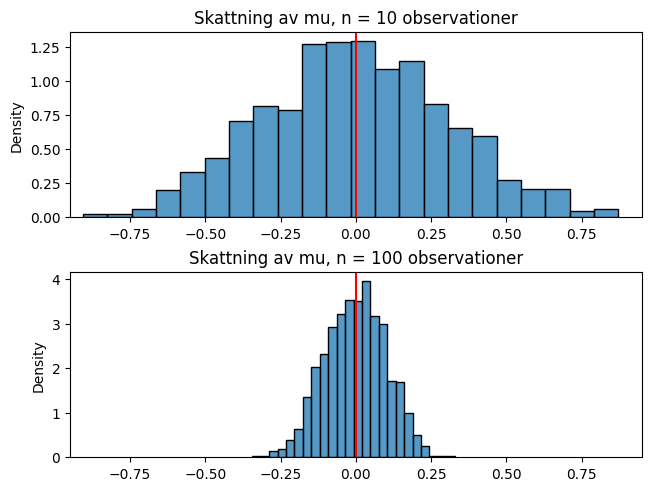

In [57]:
print(skattningar())

**Uppgift:** Kan vi normalapproximera i alla tre rummen?

Eftersom $\gamma_i^\ast \in \text{N}(\gamma_i,\sqrt{\gamma_i/(10K)})$ ges konfidensintervallet av $I_{\gamma_i} = \gamma_i^\ast \pm \lambda_{\alpha/2} \cdot d(\gamma_i^\ast)$. Använd skattningarna och medelfelt från tidigare (**g3rum** och **d3rum**) tillsammans med **stats.norm.ppf** för att beräkna konfidensintervall för $\gamma_i$

In [58]:

I3rum  = pd.DataFrame( {'undre': g3rum - stats.norm.ppf(0.975)*d3rum,
                        'övre': g3rum + stats.norm.ppf(0.975)*d3rum} )

print(I3rum)

                 undre        övre
Vardagsrum  181.742262  237.675214
Sovrum      124.112564  171.033067
Mikael      150.127555  201.328756


**Mozquizto:** Finns det en risk att radonkoncentrationen över 200 Bq/$m^3$ i något av rummen (d.v.s. innehåller intervallet 200 Bq/$m^3$)?
  
# Skattningars egenskaper
Konfidensintervallet för radonkoncentrationen ovan bygger på en normalapproximation av Poisson-fördelningen. För att få en uppfattning om hur punkt- och intervallskattningar fungerar studerar vi därför ett simulerings exempel med normalfördelad data.

## Punktskattningar
Antag att vi har ett stickprov $x_1, \ldots, x_n$ från $X_i \in \text{N}(\mu,3)$. En lämplig skattning av det okända väntevärdet $\mu$ är nu $\mu^\ast = \overline{x}$. En viktig fråga är hur bra skattningen blir för olika värden på $n$ och $\sigma$. Python rutinen **skattningar** simulerar 1000 olika stickprov och jämför skattningarna med det sanna värdet. Låts se vad som händer om vi har $n_1=5$ eller $n_2=25$ observationer sant $\mu=1$ och $\sigma=3$

In [59]:
help(skattningar)

Help on function skattningar in module skattningar:

skattningar(mu=0, sigma=1, n=(10, 100), alternativ='muskatt')
        skattningar Illustrerar mu och sigma^2-skattning samt konfidensintervall

        Ritar histogram for mu- och sigma^2-skattning eller illustrerar
        konfidensintervall for mu. Skattningarna baseras på n[0] respektive n[1]
        observationer fran en normalfördelning, N(mu, sigma).

        Parameters
        ----------
        mu : real number, optional
                Väntevärde i normalfördelningen. The default is 0.
        sigma : positive number, optional
                Standardavvikelse i normalfördelningen. The default is 1.
        n : Two positive integers in tuple or array, optional
                Antal observationer att simulera i de två stickproven. Gör det möjligt
                att jämföra hur skattningarna beter sig med olika antal observationer.
                The default is (10,100).
        alternativ : string, optional
                

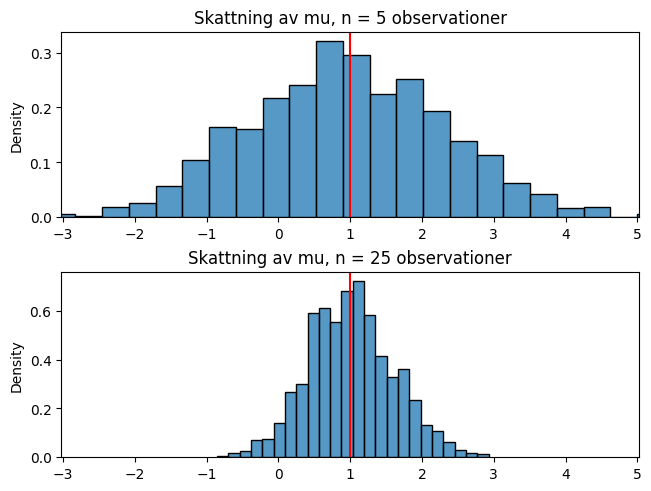

In [60]:
fig = skattningar(1, 3, (5, 25), 'muskatt')

Använd rutinen för att undersöka vad som händer när antalet observationer, $n$, och osäkerheten, $\sigma$, ändras.
**Mozquizto:** Hur bör vi välja antalet observationer, $n$, och standardavvikelsen, $\sigma$ för att få en så bra skattning som möjligt?

## Intervallskattningar
Med rutinen **skattningar** kan vi också illustrera de konfidensintervall för $\mu$ som våra 1000 stickprov genererar. Intervallet för $\mu$ ges ju av (känt $\sigma$)

$I_\mu = \mu^\ast \pm \lambda_{\alpha/2} \cdot D(\mu^\ast) = \mu^\ast \pm \lambda_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}$

För att plotta 100 intervall baserade på $n_1=5$ eller $n_2=25$ observationer med $\mu=1$ och $\sigma=3$ kan vi använda

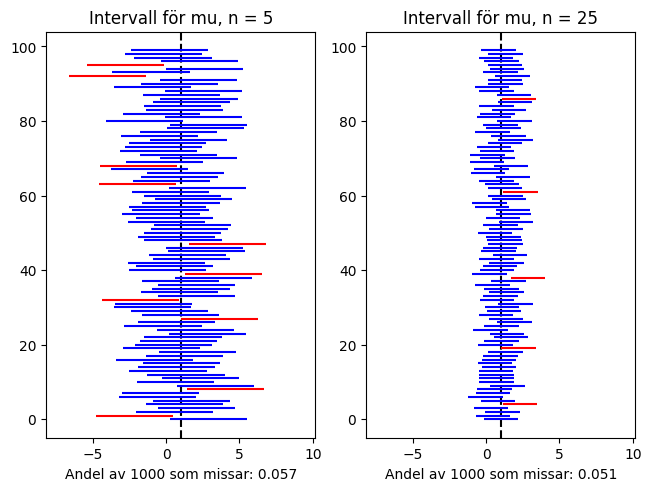

In [61]:
fig = skattningar(1, 3, (5, 25), 'konfint')

Använd rutinen för att undersöka vad som händer när antalet observationer, $n$, och osäkerheten, $\sigma$, ändras. Ändras antalet intervall som **inte** innehåller rätt värde på $\mu$ (de röda intervallen)?

**Mozquizto:** Hur påverkas intervallbredden av antalet observationer och standardavvikelsen?

# Test av Radonkoncentrationen
## Hypotesprövning med direktmetoden
Man kan också välja att utföra analysen som ett hypotesprövningsproblem. Den som ska bo i ett rum vill testa

$H_0: \gamma_i=200\ Bq/m^3 \quad$ mot $\quad H_1: \gamma_i<200\ Bq/m^3$.

**Mozquizto:** Varför vill invånarna ha ett ensidigt test åt detta hållet?

Tidigare gjorde vi punkt- och intervallskattingar av $\gamma_i$, vilket ger kvantitativ information om var de sanna värdena kan tänkas ligga. För att göra hypotestest kan vi i det här fallet använda direktmetoden, d.v.s. vi räknar ut ett $p$-värde som

$p = \mathrm{P}$(Få det vi fått eller värre om $H_0$ är sann)

och förkastar $H_0$ om $p<\alpha$. För att räkna utan normalapproximation kan vi räkna direkt med observationerna $X_{ij}\in \text{Po}(K\gamma_i)$ och framförallt utnyttja att summan av observationerna i ett rum också är Poissonfördelad, 

$Y_i = \sum_{j=1}^{10} X_{ij} \in \text{Po}(10K\gamma_i)$.

In [62]:
gamma0 = 200                       # värde under H0
mu03rum = 10*K*gamma0             # väntevärdet för summan när H0 är sann
y3rum = radon.sum()                        # summorna i de tre rummen
P3rum = stats.poisson.cdf(y3rum, mu03rum)   # P(Y_i <= y_i < H0)

print(P3rum)

[7.69440419e-01 4.86653323e-05 4.17468375e-02]


**Mozquizto:** Kan nollhypotesen förkastas på signifikansnivån $5\%$ i något av rummen?

Summan av samtliga observationer i alla rummen är också poissonfördelad. Vi räknar ut ett $p$-värde som gäller för hela huset och avgör med direktmetoden om $H_0$: $\gamma = 200$ skall förkastas, där $\gamma$ är medelradonkoncentrationen i hela huset.

In [71]:
mu0hus = 10*K*gamma0             # väntevärdet för hela huset när H0 är sann
yhus = radon.sum()               # summan för hela huset
Phus = stats.poisson.cdf(yhus, mu0hus)    # använd stats.poisson.cdf för att beräkna p-värdet

print(Phus)

[7.69440419e-01 4.86653323e-05 4.17468375e-02]



**Mozquizto:** Vad blir $p$-värdet för testet av medelradonkoncentrationen i hela huset?

# Hypotestest - Grundläggande egenskaper
Ett alternativ till direktmetoden är att räkna med normalapproximation och teststorhet. Vi behöver då vara försiktiga med att räkna medelfelet **under $H_0$**. Om $H_0$ är sann gäller, **för hela huset**, att

$\gamma^\ast = \frac{\overline{X}_1 + \overline{X}_2 + \overline{X}_3}{3K} \in \text{N}(\gamma_0,\sqrt{\frac{\gamma_0}{30K}})$

och teststorheten blir

$T = \frac{\gamma^\ast - \gamma_0}{d_{H_0}(\gamma^\ast)} = \frac{\gamma^\ast - \gamma_0}{\sqrt{\gamma_0 / 30K}}$

För de enskilda rummen har vi:

In [72]:
T = (g3rum - gamma0) / np.sqrt(gamma0 / (10*K))      # test-storhet

print("Teststorheter:", T)

print("Kvantiler:", stats.norm.ppf(0.975) )      # kvantil att jämföra test-storheten med

Teststorheter: Vardagsrum    0.696733
Sovrum       -3.762358
Mikael       -1.741833
dtype: float64
Kvantiler: 1.959963984540054


och för hela huset:

In [65]:
T = (g3rum - gamma0) / d3rum       # test-storhet

print("Teststorheter:", T)

print("Kvantiler:", stats.norm.ppf(0.975) )      # kvantil att jämföra test-storheten med

Teststorheter: Vardagsrum    0.680414
Sovrum       -4.379978
Mikael       -1.858235
dtype: float64
Kvantiler: 1.959963984540054


**Uppgift:** Blir det någon skillnad i resultatet jämfört med direktmetoden?

Precis som för konfidensintervallet ser vi att hypotestestet kan genomföras genom normalapproximation av Poisson-fördelningen. För data som är normalfördelad från början kan vi använda styrkefunktionen för att undersöka hur stora skillnader som testet kan upptäcka. (Det går att räkna ut styrka även för Poisson baserade test, men det är lite krångligare.)

## Styrkefunktion för normalfördelningar med känt $\sigma$
Funktionen **styrkefkn** illustrerar styrkefunktionen

$h(\mu) = \mathrm{P}$(förkasta $H_0$ om $\mu$ är det rätta värdet)

för test av nollhypotesen $H_0$: $\mu = \mu_0$ om observationerna är $X_i \in \text{N}(\mu,\sigma)$ med känd standardavvikelse $\sigma$ och $\mu^\ast = \bar{x}$.

In [66]:
help(styrkefkn)

Help on function styrkefkn in module styrkefkn:

styrkefkn(mu0, sigma, n, alpha=0.05, riktning='!=', mu_sant=None)
        styrkefkn Illustrerar styrekfunktion for hypotestest

        Illustrerar kritiskt omrade och styrekfunktion for hypotestest av mu under
        antagande om n observationer fran en normalfordelning, N(mu_0, sigma).

        Parameters
        ----------
        mu0 : real number
                Väntevärde i normalfördelningen.
        sigma : positive number
                Standardavvikelse i normalfördelningen.
        n : positive integer
                Antal observationer.
        alpha : värde mellan 0 och 1
                Testest signifikansnivå. The default is 0.05.
        riktning : Textsträng, optional
                Riktning på testet, '<', '>', eller '!='. The default is '!='.
        mu_sant : real number, optional
                Värde under H1 som styrkan räknas utför och typ I och II fel
                illustreras. Om det inte anges illustrerar

Använd funktionern för att illustrera $h(\mu)$ vid ett test av $H_0$: $\mu = 0$ mot $H_1$: $\mu \neq 0$ på signifikansnivån $\alpha=0.05$ med $n=10$ observationer och $\sigma=1$

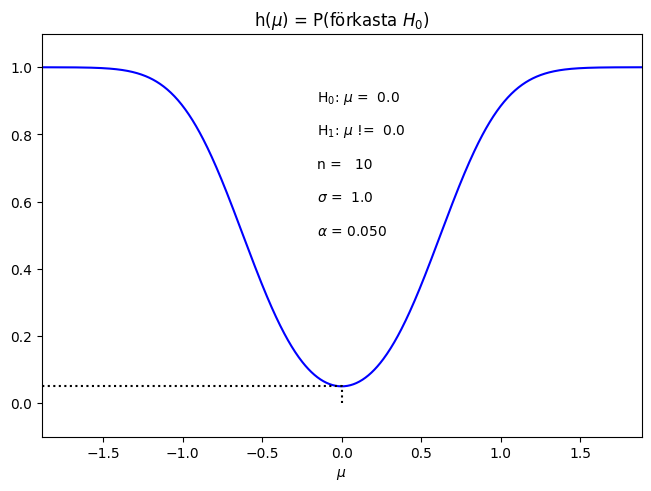

In [67]:
fig = styrkefkn(0, 1, 10, 0.05, riktning='!=')

För ensidiga test har vi

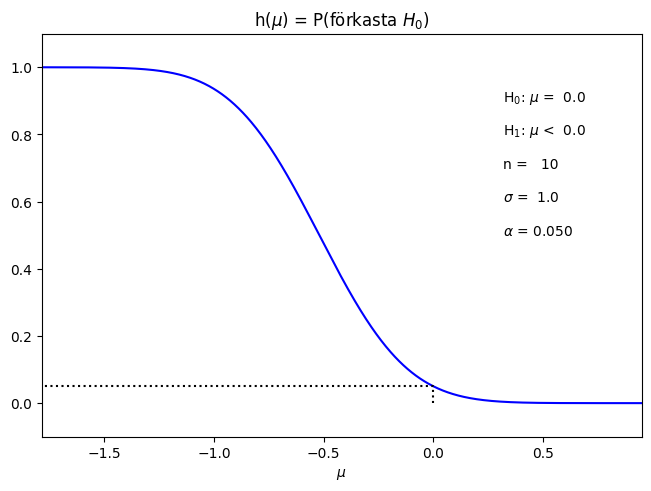

In [68]:
fig = styrkefkn(0, 1, 10, 0.05, riktning='<')

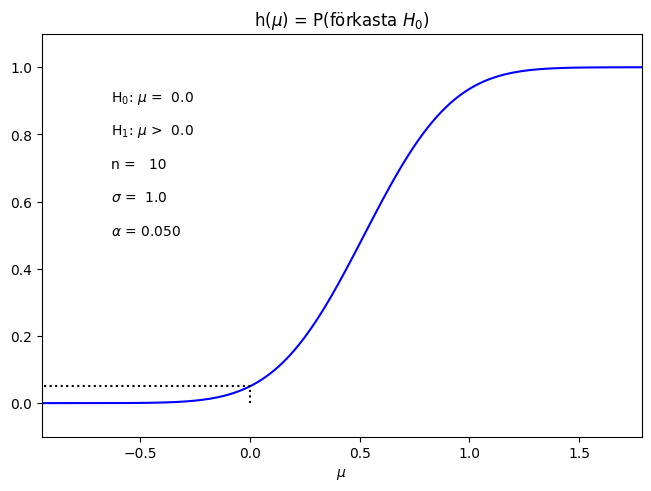

In [69]:
fig = styrkefkn(0, 1, 10, 0.05, '>')

**Uppgift:** Hur påverkas styrkefunktionen av antalet observationer, $n$, standardavvikelsen, $\sigma$, och konfidensgraden, $\alpha$?

**Mozquizto:** Undersök också hur styrkan ser ut för ensidiga test. För vilka värden är blir $h(\mu)$ stor eller liten, verkar det rimligt?

Genom att ange ytterliggare en parameter beräknas styrkan i en punkt och illustrerar regionerna för typ 1 och typ 2 fel.

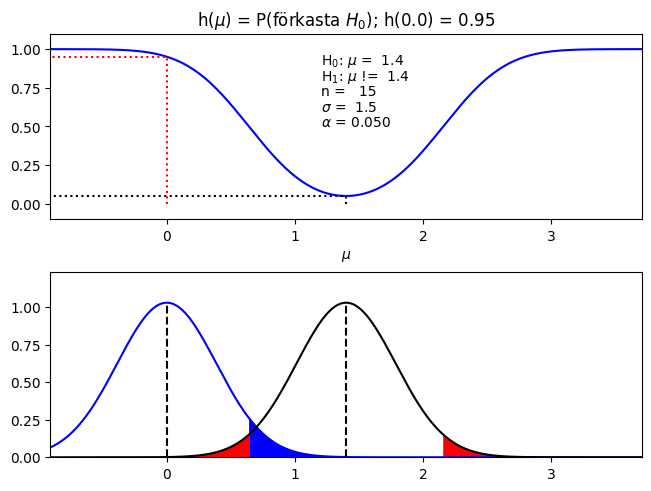

In [73]:
fig = styrkefkn(1.4, 1.5, 15, 0.05, riktning='!=', mu_sant=0)  #styrehfunktionen i 0.5, dvs h(0.5)

**Uppgift:** Vad illustrerar de blå och röda området i den övre figuren?

**Mozquizto:** Vad är sannolikheten att upptäcka att $\mu\neq 0$ om det sanna värdet är $\mu=0.5$?

## Styrkefunktion för normalfördelning med okänt $\sigma$
I de flesta praktiska situationer känner vi inte $\sigma$ utan den måste skattas med $\sigma^\ast = s$. Det gör att teststorheten 

$T = \tfrac{\mu^\ast - \mu_0}{d(\mu^\ast)}$

där $d(\mu^\ast) = s/\sqrt{n}$ blir $t(n-1)$-fördelad när $H_0$ är sann. Den kommer då att variera mer än tidigare, eftersom $s$ i nämnaren också varierar slumpmässigt. Det gör det något besvärligare att beräkna styrkan. Som tidigare vet vi att teststorheten

$T = \frac{\mu^\ast - \mu_0}{d(\mu^\ast)} = \frac{\mu^\ast - \mu_0}{s/\sqrt{n}}$

följer en $t(n-1)$-fördelning som är symmetrisk kring 0. I allmänhet, kan styrkan (d.v.s.\ $h(\mu)$ när $\mu \neq \mu_0$) beräknas med hjälp av en icke-central $t$-fördelning med $f=n-1$ frihetsgrader och centreringsparameter $\Delta = \tfrac{\mu_1 - \mu_0}{\sigma/\sqrt{n}}$. Den intresserade kan läsa mer på [wikipedia](https://en.wikipedia.org/wiki/Noncentral_t-distribution)
